In [1]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titanic.csv")

**Identifying the Missing values**

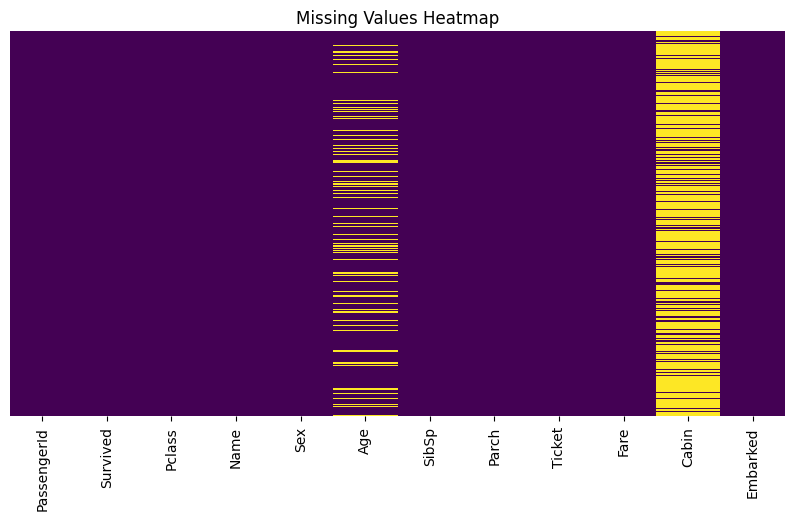

In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

**Data Distribution**

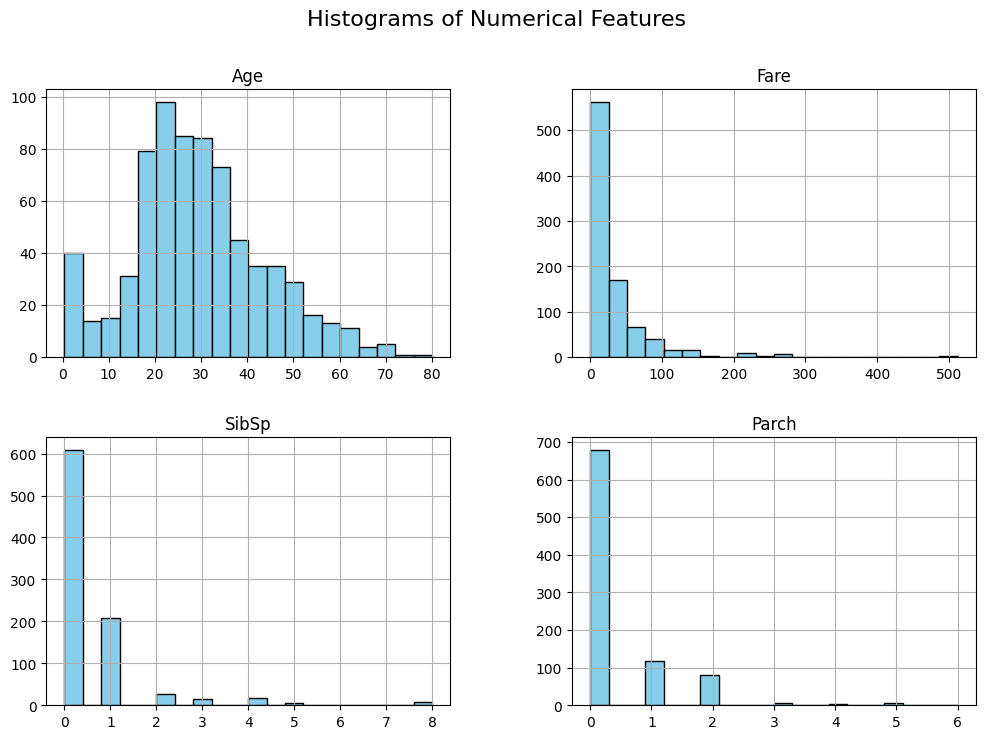

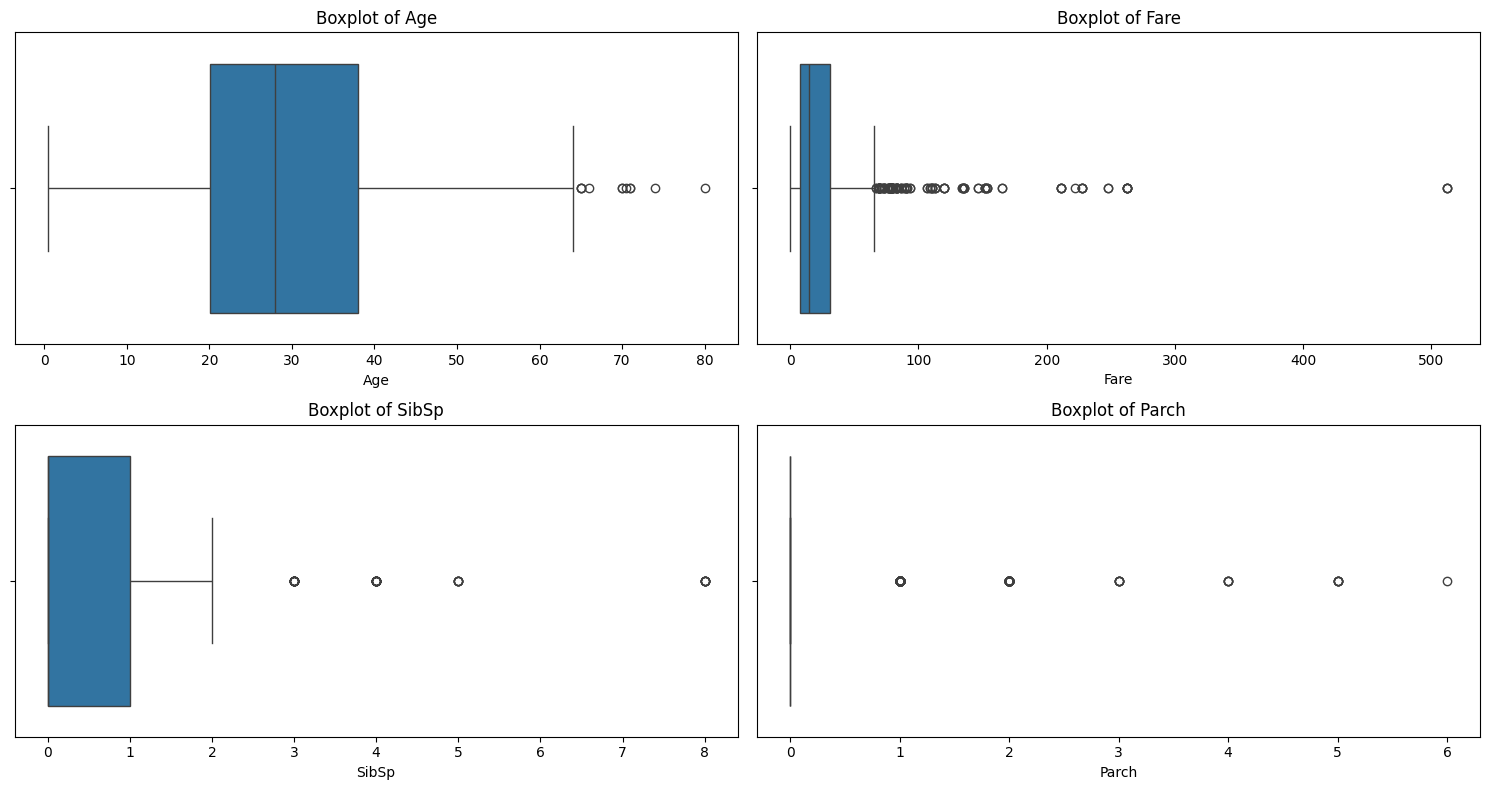

In [9]:
numerical = ['Age', 'Fare', 'SibSp', 'Parch']

df[numerical].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Box plots to check outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


**Filling the missing values**

In [5]:
from sklearn.experimental import enable_iterative_imputer as ei
from sklearn.impute import IterativeImputer as im
from sklearn.ensemble import RandomForestRegressor as rr

In [6]:
df1=df.copy()

In [7]:
numerical_cols=df1.select_dtypes(include=np.number).columns
categorical_cols=df1.select_dtypes(exclude=np.number).columns

imputer_num = im(estimator=rr(), random_state=0)
df1[numerical_cols] = imputer_num.fit_transform(df1[numerical_cols])
for col in categorical_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


**Detecting outliers**

In [8]:
Q1 = df1[numerical_cols].quantile(0.25)
Q3 = df1[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df1[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
print("Outlier count:")
print(outliers.sum())


Outlier count:
PassengerId      0
Survived         0
Pclass           0
Age             19
SibSp           46
Parch          213
Fare           116
dtype: int64


**Relationship between different variables**


Survival Count:
 Survived
0.0    549
1.0    342
Name: count, dtype: int64


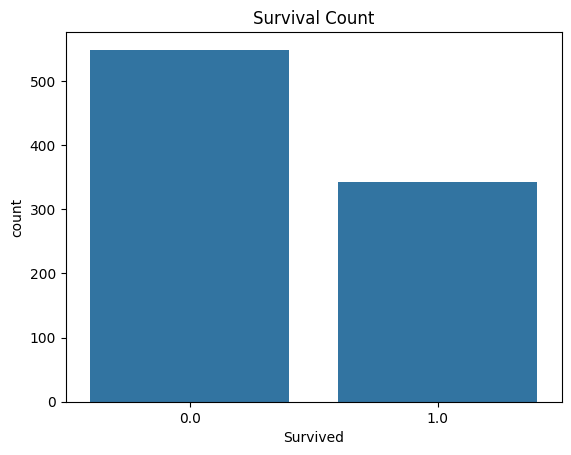

In [10]:
print("\nSurvival Count:\n", df1['Survived'].value_counts())
sns.countplot(x='Survived', data=df1)
plt.title('Survival Count')
plt.show()


Pclass Distribution:
 Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


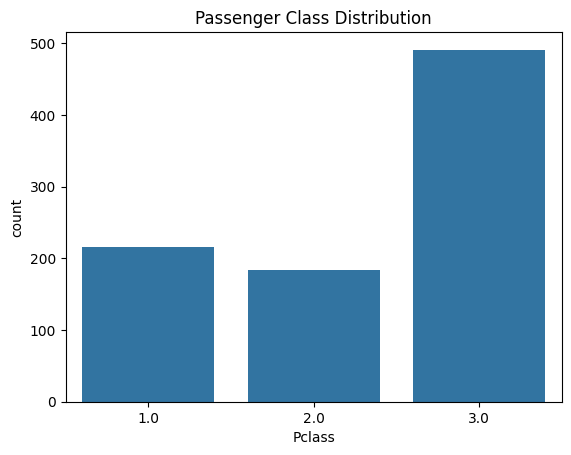

In [11]:
print("\nPclass Distribution:\n", df1['Pclass'].value_counts())
sns.countplot(x='Pclass', data=df1)
plt.title('Passenger Class Distribution')
plt.show()


Age Statistics:
 count    891.000000
mean      29.575547
std       13.711760
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


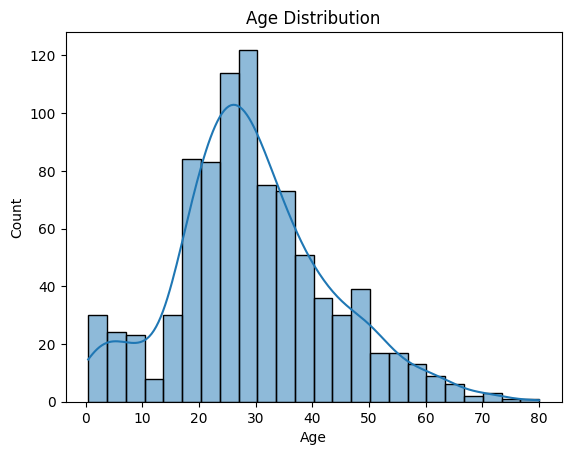

In [12]:
print("\nAge Statistics:\n", df1['Age'].describe())
sns.histplot(x='Age', data=df1, kde=True)
plt.title('Age Distribution')
plt.show()


Sex Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64


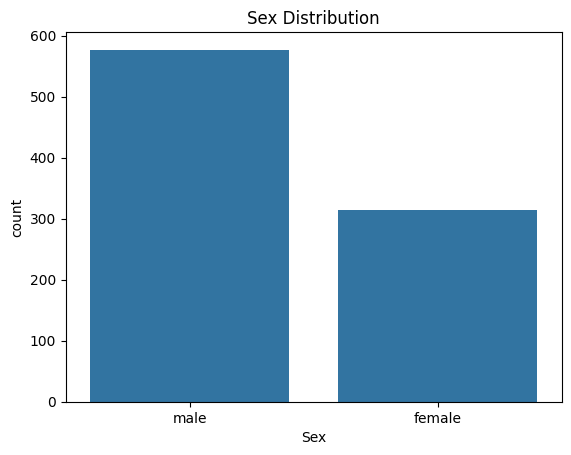

In [13]:
print("\nSex Distribution:\n", df1['Sex'].value_counts())
sns.countplot(x='Sex', data=df1)
plt.title('Sex Distribution')
plt.show()

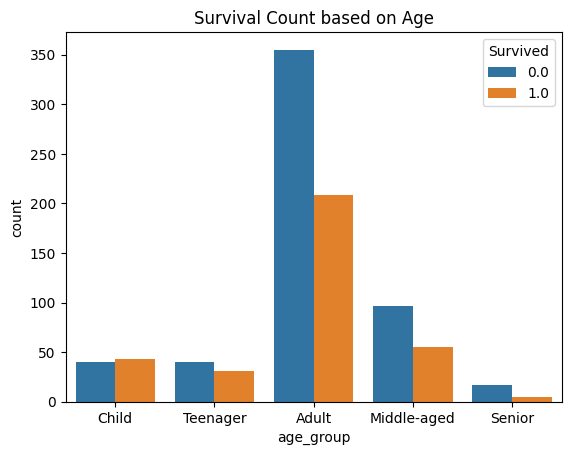

In [14]:
# Visualization of survivals based on different age groups, Pclass, Sex

#based on age groups
bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
df1['age_group'] = pd.cut(df1['Age'], bins=bins, labels=labels)
sns.countplot(x='age_group', hue='Survived', data=df1)
plt.title('Survival Count based on Age')
plt.show()

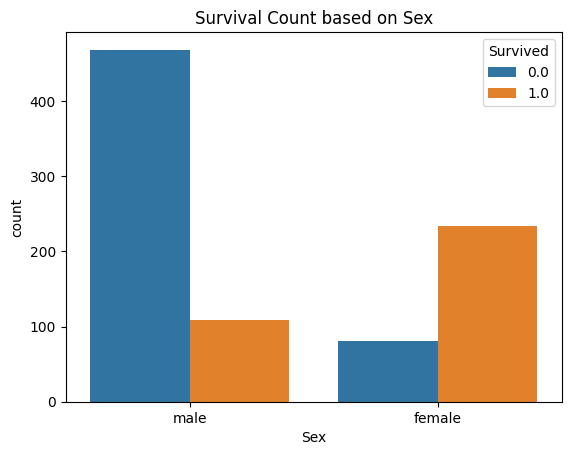

In [15]:
# based on Sex
sns.countplot(x='Sex', hue='Survived', data=df1)
plt.title('Survival Count based on Sex')
plt.show()

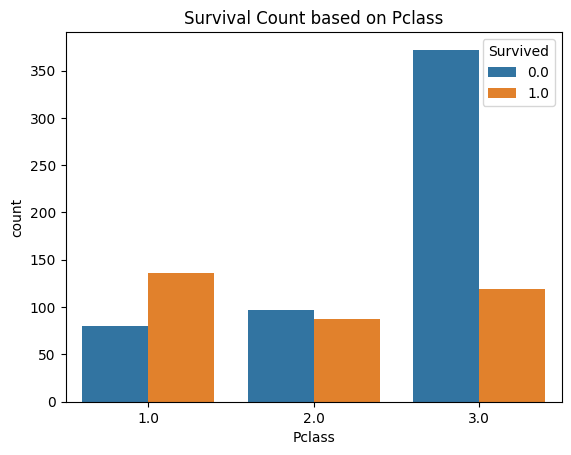

In [16]:
#based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=df1)
plt.title('Survival Count based on Pclass')
plt.show()

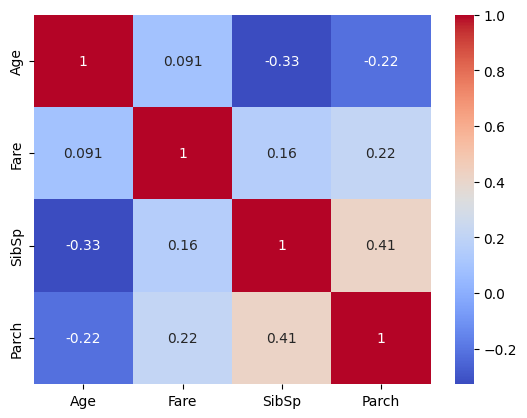

In [17]:
#finding the correlation coefficient
correlation_matrix = df1[['Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
